In [1]:
import os
import sys, imp
# imp.reload(sys.modules['KerasModelManager'])
# imp.reload(sys.modules['models.models'])
# imp.reload(sys.modules['PandasDataManager'])
from PandasDataManager import PandasDataManager
from KerasModelManager import KerasModelManager
from models.models import l4_mp2_reg, l4_mp2_reg_dropout
import tensorflow as tf
from constants import target_name, x_path, y_path, x_test_path, y_test_path, preprocessed_data, x_reduced_path
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import pandas as pd
from ProcessManager import ProcessManager

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
pm = ProcessManager()


/var/folders/r3/hdngxsmd2vq391vqv6kg6f7w0000gq/T/ipykernel_38912/3361510614.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import sys, imp


Process Manager Ready.


X_train: (1116, 140)
X_valid: (198, 140)
Xt: (146, 140)
Epoch 1/100


2023-01-25 18:49:13.123092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 6s 448ms/step - loss: 179963.3125 - mean_absolute_error: 179963.3125 - val_loss: 187520.7031 - val_mean_absolute_error: 187520.7031
Epoch 2/100


2023-01-25 18:49:15.832531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 2s 417ms/step - loss: 179024.0000 - mean_absolute_error: 179642.5000 - val_loss: 184074.5625 - val_mean_absolute_error: 184074.5625
Epoch 3/100
4/4 [==============================] - 1s 312ms/step - loss: 173314.9062 - mean_absolute_error: 174854.2812 - val_loss: 173933.5781 - val_mean_absolute_error: 173933.5781
Epoch 4/100
4/4 [==============================] - 1s 306ms/step - loss: 157625.2969 - mean_absolute_error: 155833.5625 - val_loss: 150599.4531 - val_mean_absolute_error: 150599.4531
Epoch 5/100
4/4 [==============================] - 1s 312ms/step - loss: 128804.5547 - mean_absolute_error: 122158.0312 - val_loss: 104115.5156 - val_mean_absolute_error: 104115.5156
Epoch 6/100
4/4 [==============================] - 1s 332ms/step - loss: 75706.9375 - mean_absolute_error: 75706.9375 - val_loss: 56529.8906 - val_mean_absolute_error: 56529.8906
Epoch 7/100
4/4 [==============================] - 1s 361ms/step - loss: 60895.4414 - mean_absolute_e

2023-01-25 18:51:35.836637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



> Model: callback01
For Test Data:  (146, 140)
- MAE:  45200.223432148974
- MSE:  3518281074.8208594
- RMSE:  59315.099888821394
 [time secs:  146.00940608978271 ]
DONE.


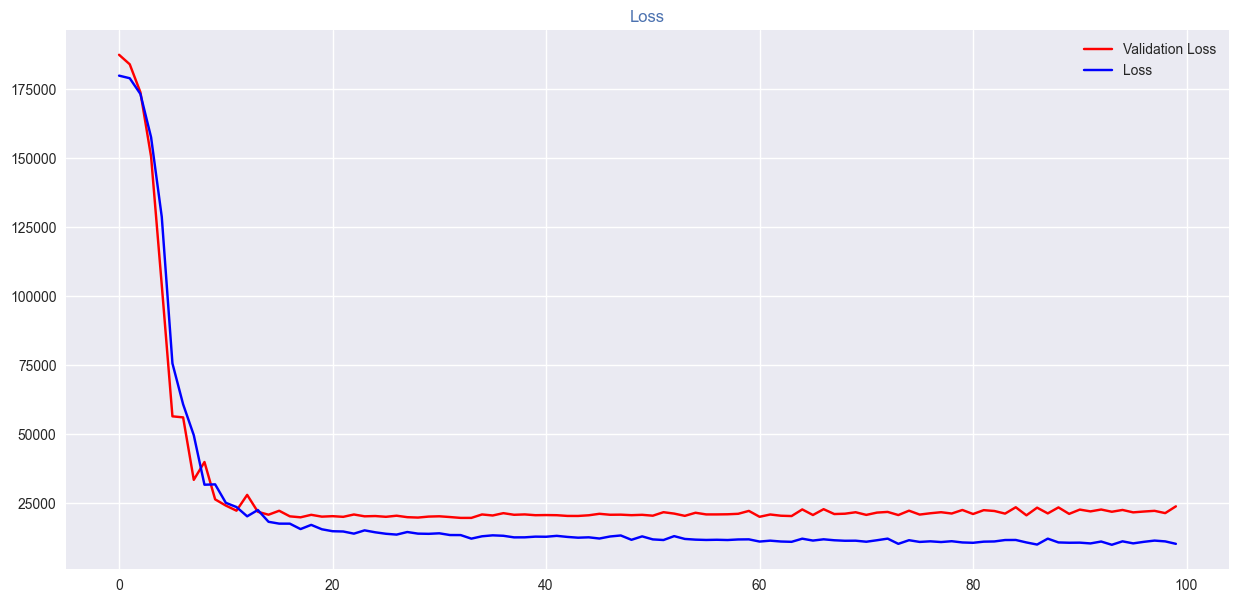

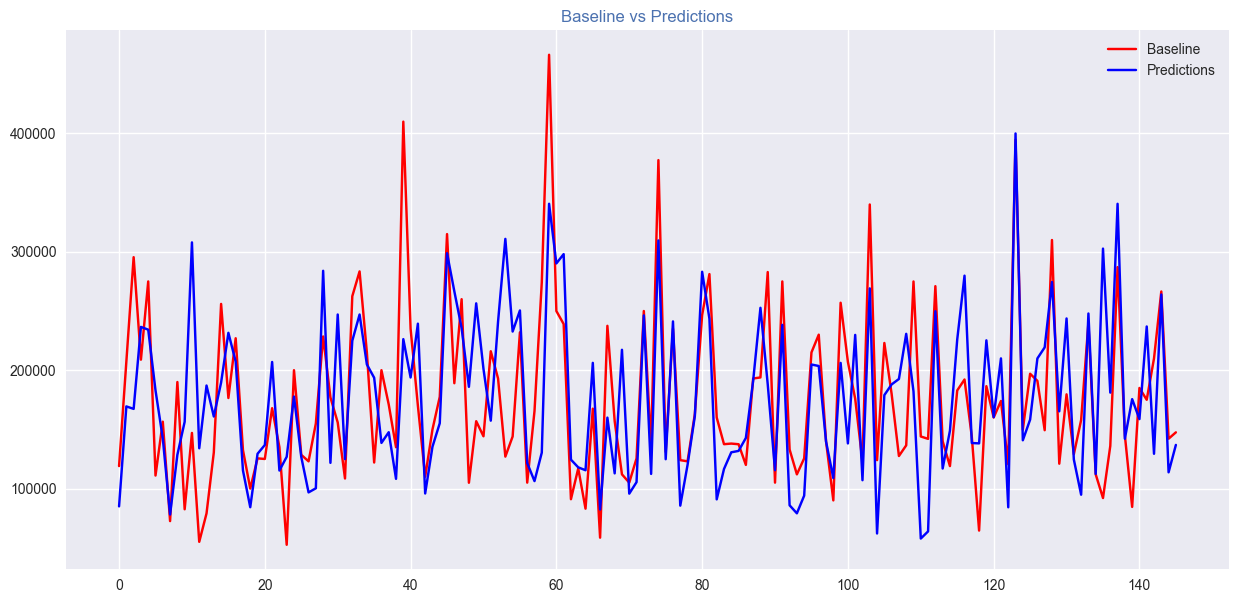

In [9]:
# mae <= L1 (ae)
# mse <= L2

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    mode='min',
    min_delta=1500,    # minimium amount of change to count as an improvement
    patience=3,         # how many epochs to wait before stopping
    restore_best_weights=True,
    verbose=2
)

params = [
    # {   #53565
    #     'models': [{'model': l4_mp2_reg(1024, 160, 6, 2), 'name': 'model160', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.65)/256), 'val_batch': None, 'val_steps': None}],  'train_perc': 0.65, 'test_perc': 0.2, 'reduce': 160
    # },
    # {   #78833
    #     'models': [{'model': l4_mp2_reg(1024, 221, 6, 2), 'name': 'model no reduce', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.65)/256), 'val_batch': None, 'val_steps': None}],  'train_perc': 0.65, 'test_perc': 0.1, 'reduce': None
    # },
    # {   #99115
    #     'models': [{'model': l4_mp2_reg(1024, 221, 6, 2), 'name': 'model no reduce a', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.65)/256), 'val_batch': None, 'val_steps': None}],  'train_perc': 0.65, 'test_perc': 0.05, 'reduce': None
    # },
    # {   #47530
    #     'models': [{'model': l4_mp2_reg(1024, 140, 6, 2, activity_regularizer=tf.keras.regularizers.l1(0.0005)), 'name': 'model140L1-0005-mse', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}],  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mse'
    # },
    # {   #47539
    #     'models': [{'model': l4_mp2_reg(1024, 140, 6, 2, activity_regularizer=tf.keras.regularizers.l1(0.001)), 'name': 'model140L1-001-mse', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}],  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mse'
    # },
    # {   #174693
    #     'models': [{'model': l4_mp2_reg(1024, 140, 6, 2, activity_regularizer=tf.keras.regularizers.l2(0.001)), 'name': 'model140L2-001-msle', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'msle'
    # },
    # {   #46255
    #     'models': [{'model': l4_mp2_reg(1024, 140, 6, 2, activity_regularizer=tf.keras.regularizers.l2(0.001))
    #     , 'name': 'model140L2-001-mae-val128-075', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.75)/256), 'val_batch': 128, 'val_steps': int((1460 * 0.25)/128)}]
    #     ,  'train_perc': 0.75, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #46054
    #     'models': [{'model': l4_mp2_reg(1024, 140, 6, 2, activity_regularizer=tf.keras.regularizers.l2(0.001))
    #     , 'name': 'model140L2-001-mae-val128-065', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.65)/256), 'val_batch': 128, 'val_steps': int((1460 * 0.35)/128)}]
    #     ,  'train_perc': 0.65, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #46248
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, activity_regularizer=None, dropout=0.3)
    #                    , 'name': 'model140L2-001-mae-drop', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #45471
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, activity_regularizer=None, dropout=0.7)
    #                    , 'name': 'model140L2-001-mae-drop', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #45553, 45527
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, activity_regularizer=tf.keras.regularizers.l2(0.001), dropout=0.8)
    #                    , 'name': 'model140-mse-drop-L2', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mse'
    # },
    # {   #44658, 45097, 44781
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, activity_regularizer=tf.keras.regularizers.l1(0.001), dropout=0.8)
    #                    , 'name': 'model140-mae-drop-L1', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #47796, 47882, 49274
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, activity_regularizer=tf.keras.regularizers.l2(0.001), dropout=0.8)
    #                    , 'name': 'model140-mae-drop-L2', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # try L2 with 0.0001
    # try , activation='linear'
    # {   #48049
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, activity_regularizer=tf.keras.regularizers.l2(0.001), dropout=0.8)
    #                    , 'name': 'model140-mae-drop-L2-e150', 'batch': 256, 'epochs':150, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #52063
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, activity_regularizer=None, dropout=0.8, activation='linear')
    #                    , 'name': 'model140L2-001-mae-drop-lin', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #45553
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 70, 6, 2, dropout=0.8, activity_regularizer=tf.keras.regularizers.l1(0.0001))
    #                    , 'name': 'test-05', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.05, 'reduce': 70, 'loss': 'mae'
    # },
    # {   #54239
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, dropout=0.8, activity_regularizer=tf.keras.regularizers.l1(0.0001))
    #                    , 'name': 'test-20', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.2, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #45031, 45749
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, dropout=0.8, activity_regularizer=tf.keras.regularizers.l1(0.0001))
    #                    , 'name': 'model140L2-001-mae-drop', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #45356
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, activity_regularizer=None, dropout=0.8, activation2='linear')
    #                    , 'name': 'act2-001-mae-drop', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #53356
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, activity_regularizer=None, dropout=0.8)
    #                    , 'name': 'norm-01', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae', 'normalize': True
    # },
    # {   #46126
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, activity_regularizer=None, dropout=0.2)
    #                    , 'name': 'drop02', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #47563
    #     'models': [{'model': l4_mp2_reg(1024, 140, 6, 2, activity_regularizer=tf.keras.regularizers.l2(0.001))
    #     , 'name': 'model140L2-001-mae-val128-085', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': 128, 'val_steps': int((1460 * 0.15)/128)}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mse', 'metrics': [tf.keras.losses.MeanSquaredError()], 'normalize': None
    # },
    {   #45632, 44922, 45014
        'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, activity_regularizer=None, dropout=0.8)
                       , 'name': 'callback01', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
        ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae', 'metrics': [tf.keras.losses.MeanAbsoluteError()], 'normalize': None
        , 'callbacks': [early_stopping]
    },
    # {   #44978, 45796, 45071, 44614, 44770, 45363, 45833, 44738, 44961
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, activity_regularizer=None, dropout=0.8)
    #                    , 'name': 'baseline', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae', 'metrics': [tf.keras.losses.MeanAbsoluteError()], 'normalize': None
    # },
    # {   #48327
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, activity_regularizer=None, dropout=0.9)
    #                    , 'name': 'model140L2-001-mae-drop', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #44198, 44372
    #     'models': [{'model': l4_mp2_reg(1024, 140, 6, 2, activity_regularizer=tf.keras.regularizers.l2(0.001))
    #     , 'name': 'model140L2-001-mae-val128-085', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': 128, 'val_steps': int((1460 * 0.15)/128)}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #46547
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, activity_regularizer=None)
    #                    , 'name': 'model140L2-001-mae-drop', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #45805
    #     'models': [{'model': l4_mp2_reg_dropout(1024, 140, 6, 2, activity_regularizer=tf.keras.regularizers.l2(0.001))
    #                    , 'name': 'model140L2-001-mae-drop', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #47546, 45257, 44628, 44707, 44042
    #     'models': [{'model': l4_mp2_reg(1024, 140, 6, 2, activity_regularizer=tf.keras.regularizers.l2(0.001))
    #                    , 'name': 'model140L2-001-mae', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #47493
    #     'models': [{'model': l4_mp2_reg(1024, 140, 6, 2, activity_regularizer=tf.keras.regularizers.l2(0.005)), 'name': 'model140L2-005-mse', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}],  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mse'
    # },
    # {   #46830
    #     'models': [{'model': l4_mp2_reg(1024, 140, 6, 2), 'name': 'model140-e110-L1-001-mae', 'batch': 256, 'epochs':110, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   #46861, 45700, 46974, 45916, 46830
    #     'models': [{'model': l4_mp2_reg(1024, 140, 6, 2), 'name': 'model140L1-001-mae', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.85)/256), 'val_batch': None, 'val_steps': None}]
    #     ,  'train_perc': 0.85, 'test_perc': 0.1, 'reduce': 140, 'loss': 'mae'
    # },
    # {   # 46492, 46982
    #     'models': [{'model': l4_mp2_reg(1024, 140, 6, 2), 'name': 'model140b', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.75)/256), 'val_batch': None, 'val_steps': None}],  'train_perc': 0.75, 'test_perc': 0.1, 'reduce': 140
    # },
    # {   # 47246, 47449, 47264, 46769, 47936
    #     'models': [{'model': l4_mp2_reg(1024, 140, 6, 2), 'name': 'model140c', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.65)/256), 'val_batch': None, 'val_steps': None}],  'train_perc': 0.65, 'test_perc': 0.1, 'reduce': 140
    # },
    # {   #48034
    #     'models': [{'model': l4_mp2_reg(1024, 120, 6, 2), 'name': 'model120', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.65)/256), 'val_batch': None, 'val_steps': None}],  'train_perc': 0.65, 'test_perc': 0.1, 'reduce': 120
    # },
    # {   # 47733
    #     'models': [{'model': l4_mp2_reg(1024, 100, 6, 2), 'name': 'model100', 'batch': 256, 'epochs':100, 'steps_per_epoch': int((1460 * 0.65)/256), 'val_batch': None, 'val_steps': None}],  'train_perc': 0.65, 'test_perc': 0.1, 'reduce': 100
    # }
]

res = []
names = []

for p in params:
    mae_res, model_name = pm.run(p['models']
                                 , train_perc=p['train_perc'], test_perc=p['test_perc'], train_data_from_beginning=True, rescalex=True, reduce=p['reduce'], loss=p['loss'], normalize=p['normalize'])
    res.append(mae_res)
    names.append(model_name)

pm.ping()

X_train: (1300, 140)
X_valid: (14, 140)
Xt: (146, 140)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 140)               19740     
                                                                 
 dropout_21 (Dropout)        (None, 140)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               36096     
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 512)               131584    
                                                                 
 dropout_23 (Dropout)        (None, 512)               0         
                                                                 

2023-01-26 15:36:12.101199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/162 [============================>.] - ETA: 0s - loss: 35645689856.0000 - mean_absolute_error: 171489.2344

2023-01-26 15:36:17.530962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


162/162 [==============================] - 7s 27ms/step - loss: 35266723840.0000 - mean_absolute_error: 170367.8750 - val_loss: 15383308288.0000 - val_mean_absolute_error: 110036.0000
Epoch 2/50
162/162 [==============================] - 4s 20ms/step - loss: 3426916096.0000 - mean_absolute_error: 39388.3633 - val_loss: 3953006592.0000 - val_mean_absolute_error: 46387.3125
Epoch 3/50
162/162 [==============================] - 3s 16ms/step - loss: 936185152.0000 - mean_absolute_error: 19064.7344 - val_loss: 4023623424.0000 - val_mean_absolute_error: 46894.0352
Epoch 4/50
162/162 [==============================] - 3s 18ms/step - loss: 842520768.0000 - mean_absolute_error: 17320.5430 - val_loss: 3892673280.0000 - val_mean_absolute_error: 46847.6367
Epoch 5/50
162/162 [==============================] - 3s 21ms/step - loss: 778367040.0000 - mean_absolute_error: 17145.5273 - val_loss: 3886168064.0000 - val_mean_absolute_error: 46902.5273
Epoch 6/50
162/162 [==============================] - 3

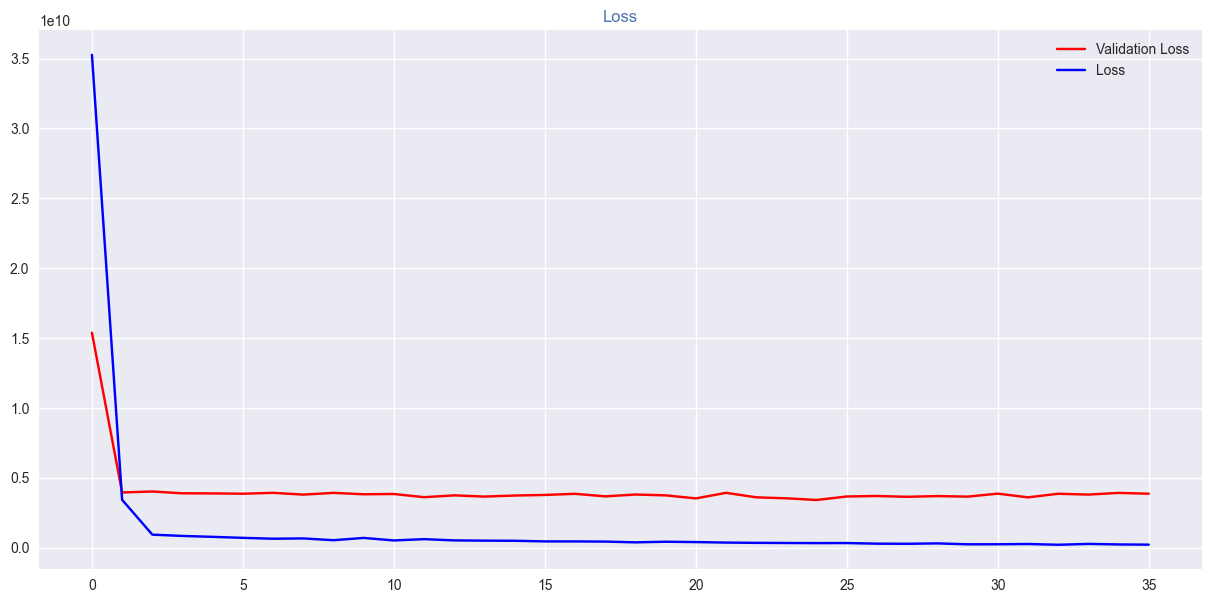

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    mode='min',
    min_delta=0.0001,    # minimium amount of change to count as an improvement
    patience=3,         # how many epochs to wait before stopping
    restore_best_weights=True,
    verbose=2
)

units_base = 1024
mp = 6
mp2 = 2
dropout = 0.1
batch = 8
epochs = 50
train_perc = 0.99
test_perc = 0.1
reduce = 140
loss = tf.keras.losses.MeanSquaredError()
metrics = [tf.keras.losses.MeanAbsoluteError()] # metryka dla nas
activation = 'relu'
kernel_init = tf.keras.initializers.GlorotNormal(seed=7)  # Xavier
# bias_init = tf.keras.initializers.Zeros()
activity_regularizer = tf.keras.regularizers.l1(0.001)

pdm = PandasDataManager()
X_train, X_valid, y_train, y_valid, Xt, yt = pdm.load_split_train_valid_test(path=preprocessed_data
                                                                             , target_name=target_name
                                                                             , train_perc=train_perc
                                                                             , test_perc=test_perc
                                                                             , train_data_from_beginning=True
                                                                             , rescalex=True
                                                                             , reduce=reduce
                                                                             )
print('X_train:', X_train.shape)
print('X_valid:', X_valid.shape)
print('Xt:', Xt.shape)

input_shape = X_train.shape[1]
steps_per_epoch = int((X_train.shape[0]) / batch) # na każdą epokę będzie jeden 279 batchy, 4 * 279 = 1116 rekordów, wszystkie dane są wykorzystane

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(140
                                , activation=activation
                                , input_shape=[input_shape]
                                # , kernel_initializer=kernel_init
                                # , bias_initializer=bias_init
                                ))
model.add(tf.keras.layers.Dropout(dropout))
model.add(tf.keras.layers.Dense(256
                                , activation=activation
                                # , kernel_initializer=kernel_init
                                # , bias_initializer=bias_init
                                # , activity_regularizer=activity_regularizer
                                ))
model.add(tf.keras.layers.Dropout(dropout))
model.add(tf.keras.layers.Dense(512
                                , activation=activation
                                # , kernel_initializer=kernel_init
                                # , bias_initializer=bias_init
                                # , activity_regularizer=activity_regularizer
                                ))
model.add(tf.keras.layers.Dropout(dropout))
model.add(tf.keras.layers.Dense(1))

print("Model Summary: ", model.summary())

model.compile(
    optimizer=tf.keras.optimizers.Adam()
    , loss=loss
    , metrics=metrics
)

history = model.fit(x=X_train, y=y_train
                              , validation_data=(Xt, yt)
                              , batch_size=batch
                              , epochs=epochs
                              , verbose=1
                              , steps_per_epoch=steps_per_epoch
                              , callbacks=[early_stopping]
                              )

history_df = pd.DataFrame(history.history)
print("Mean Validation Loss: {:0.5f}".format(history_df['val_loss'].mean()))

mpl.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title("Loss", color='C0')
ax.plot(range(len(history_df.val_loss)), history_df.val_loss, color="#f00", label="Validation Loss")
ax.plot(range(len(history_df.loss)), history_df.loss, color="#00f", label="Loss")
plt.legend()
pm.ping()


In [16]:
X_train

array([[ 1.90336176e+00,  3.00199753e-01, -1.28527118e+00, ...,
         3.75686799e-02,  5.48256413e-02,  3.20158447e-02],
       [-1.25924657e+00, -1.89187343e-01,  8.49311765e-02, ...,
        -7.25439672e-02,  4.17115285e-03, -8.65615328e-02],
       [ 1.39128205e+00,  1.08787074e+00,  7.66217030e-01, ...,
        -4.14703457e-03, -7.88801959e-03,  5.40391576e-03],
       ...,
       [-3.43443617e-01,  9.35980139e-01, -1.13189336e-02, ...,
         2.69106075e-02, -4.99491522e-02,  3.51366139e-04],
       [ 1.53738607e+00, -1.60957677e-01, -6.75713180e-01, ...,
         9.38157880e-04,  1.82540338e-02, -1.15834478e-02],
       [ 1.53281638e+00,  1.13760790e-01,  1.11906892e+00, ...,
         1.10387581e-02, -1.67587384e-02, -9.06957300e-03]])

In [19]:
Xt


array([[-1.15772612e+00,  6.57688576e-01, -9.50719403e-01, ...,
         5.37764278e-17,  9.49761103e-17,  8.15320034e-17],
       [-6.07220693e-01,  8.63124922e-01,  1.55603026e+00, ...,
         1.94289029e-16,  8.24861013e-16,  6.81746326e-16],
       [ 1.98223143e+00, -3.80602866e-02, -4.79340980e-01, ...,
        -5.10008702e-16, -3.21357524e-16, -5.36029554e-16],
       ...,
       [-1.52419329e-01, -3.93563443e-01,  1.08997551e+00, ...,
        -5.75928194e-16, -2.22044605e-16,  5.27355937e-16],
       [-7.25242798e-01,  1.40583124e+00, -6.57175612e-01, ...,
         1.73472348e-17, -2.12503626e-16, -2.65412692e-16],
       [-4.56224055e-01,  1.35467138e+00,  3.96858252e-03, ...,
         1.29410371e-15,  1.26201133e-16,  4.00721123e-16]])

1/1 [==============================] - 0s 33ms/step
For Test Data:  (146, 140)
- MAE:  19524.62276785714
- MSE:  526879310.1320714
- RMSE:  22953.85174937033


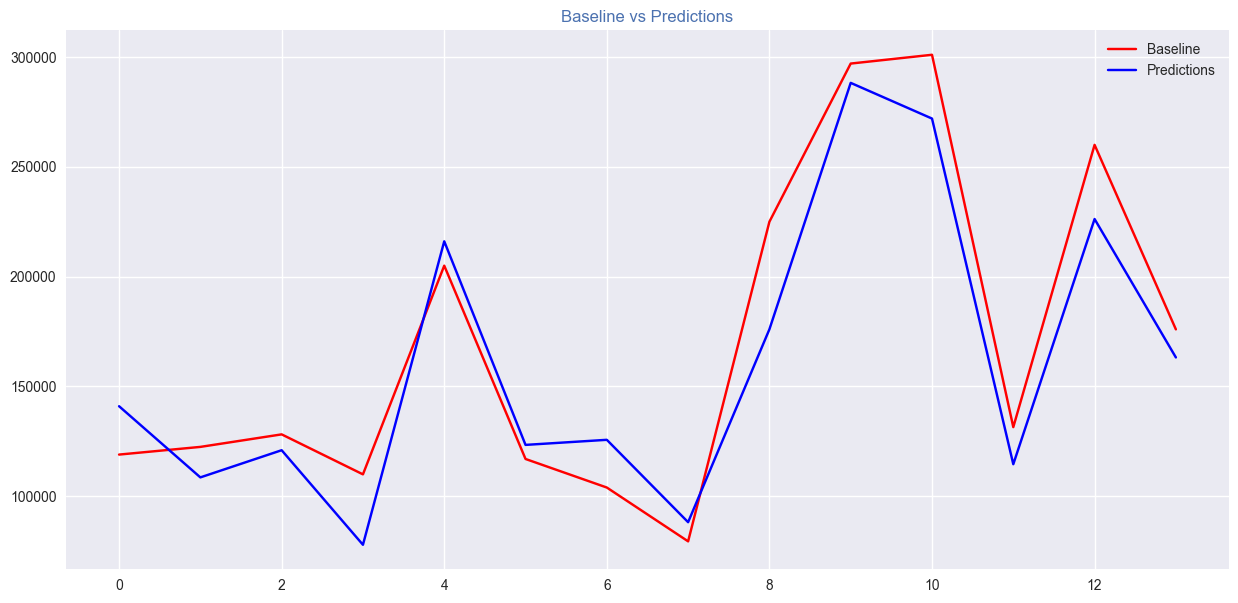

In [24]:
import sklearn.metrics as skm
import numpy as np

y_pred = model.predict(X_valid)

res = {}
# mae = metrics.mean_absolute_error(true, predicted)
res['mse'] = skm.mean_squared_error(y_valid, y_pred)
res['rmse'] = np.sqrt(skm.mean_squared_error(y_valid, y_pred))
# res['r2_square'] = metrics.r2_score(y, self.y_pred)
res['mae'] = skm.mean_absolute_error(y_valid, y_pred)
# res['mape'] = metrics.mean_absolute_percentage_error(y, self.y_pred)

print("For Test Data: ", Xt.shape)
print("- MAE: ", res['mae'])
# print("- MAE %: ", res['mape'])
print("- MSE: ", res['mse'])
print("- RMSE: ", res['rmse'])


mpl.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title("Baseline vs Predictions", color='C0')
ax.plot(range(len(y_valid)), y_valid, color="#f00", label="Baseline")
ax.plot(range(len(y_pred)), y_pred, color="#00f", label="Predictions")
plt.legend()


/var/folders/r3/hdngxsmd2vq391vqv6kg6f7w0000gq/T/ipykernel_38912/2036298732.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yt)


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

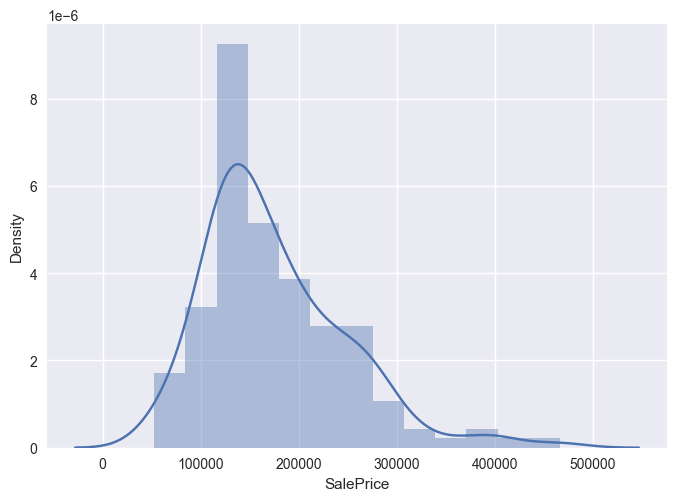

In [21]:
import seaborn as sns

sns.distplot(yt)
# mpl.style.use('seaborn-v0_8')
# fig, ax = plt.subplots(figsize=(15, 7))
# ax.set_title("Loss", color='C0')
# ax.plot(range(len(yt)), yt, color="#f00", label="yt")
# # ax.plot(range(len(history_df.loss)), history_df.loss, color="#00f", label="Loss")
# plt.legend()
# pm.ping()